In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [2]:
data = pd.read_csv("20-04-2021-results_2d.csv")

In [27]:
#data =  data[(data.n>10000) & (data.opt!=3)]

In [28]:
data

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
0,0,99,77,0.1,256,4,True,0.00100,100000,1
2,2,99,83,0.1,256,4,True,0.01000,100000,1
3,3,99,88,0.1,256,4,True,0.00010,100000,1
5,5,94,60,0.1,256,4,True,0.00001,100000,1
6,6,99,87,0.1,256,4,False,0.00100,100000,1
7,7,99,84,0.1,256,4,False,0.01000,100000,1
8,8,99,78,0.1,256,4,False,0.00010,100000,1
9,9,99,70,0.1,256,4,False,0.00001,100000,1
11,11,99,83,0.1,512,4,True,0.00100,100000,1
12,12,99,82,0.1,512,4,True,0.01000,100000,1


8
8


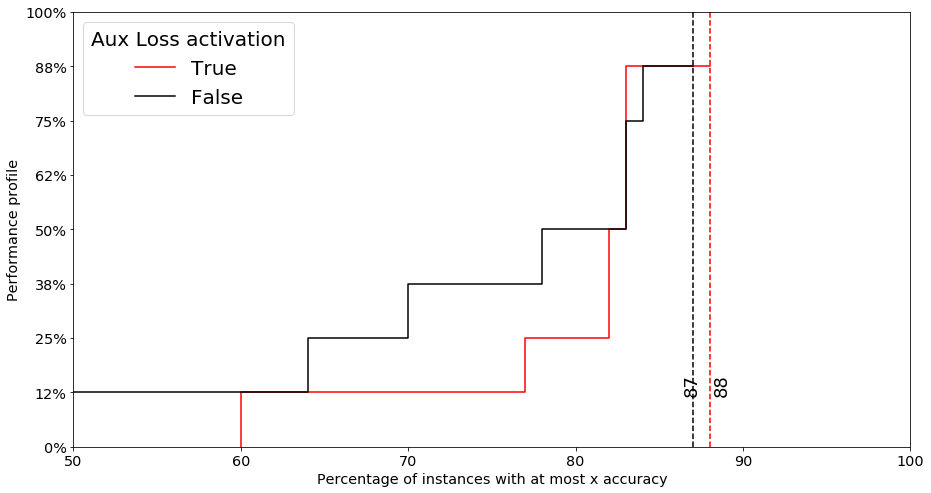

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


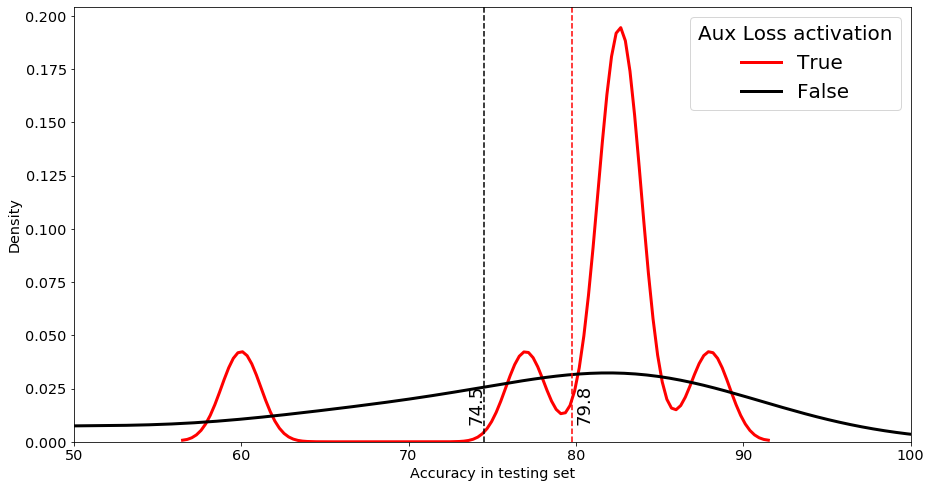

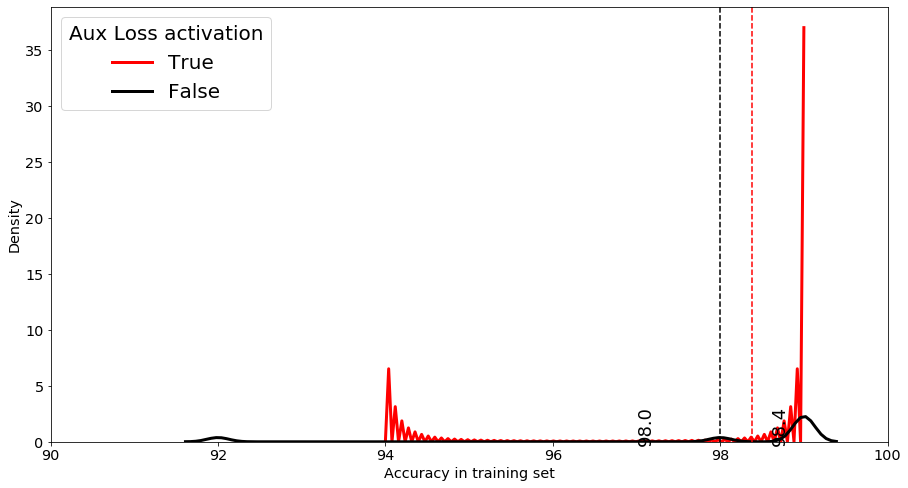

In [30]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size), color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
plt.xlabel('Percentage of instances with at most x accuracy')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20, loc='upper left')

plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')


max1 = np.round(data[data.aux_loss_activated==True]['acc_test'].max(),1)
max2 = np.round(data[data.aux_loss_activated==False]['acc_test'].max(),1)
plt.text(max1+0.2, 1,str(max1),rotation=90, fontsize=18)
plt.text(max2-0.6, 1,str(max2),rotation=90, fontsize=18)


plt.ylabel('Performance profile')
plt.xlim(50,100)
plt.ylim(0,subset.shape[0])
plt.show()



plt.figure(figsize=(15,8))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(50,100)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_test'].mean(),1)
plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()



plt.figure(figsize=(15,8))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_train'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(90,100)
plt.xlabel('Accuracy in training set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_train'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_train'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_train'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_train'].mean(),1)
plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

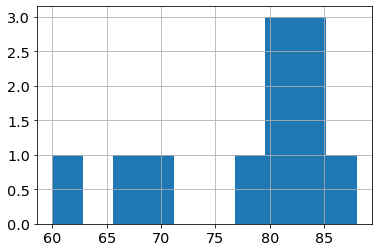

In [6]:
data_aux = data[(data.aux_loss_activated==True)]

data_aux.acc_test.hist()

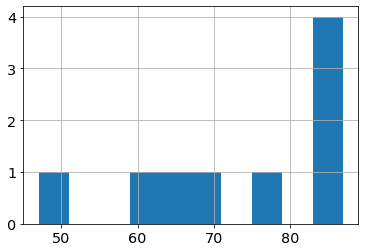

In [7]:
data_non_aux = data[(data.aux_loss_activated==False)]
data_non_aux.acc_test.hist()

In [8]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
3,3,99,88,0.1,256,4,True,0.00010,100000,1
2,2,99,83,0.1,256,4,True,0.01000,100000,1
11,11,99,83,0.1,512,4,True,0.00100,100000,1
13,13,99,83,0.1,512,4,True,0.00010,100000,1
4,4,99,82,0.1,256,4,True,0.00001,10000,1
12,12,99,82,0.1,512,4,True,0.01000,100000,1
14,14,99,82,0.1,512,4,True,0.00001,100000,1
0,0,99,77,0.1,256,4,True,0.00100,100000,1
1,1,98,70,0.1,256,4,True,0.01000,10000,1
10,10,98,66,0.1,512,4,True,0.00100,10000,1


In [9]:
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
6,6,99,87,0.1,256,4,False,0.00100,100000,1
7,7,99,84,0.1,256,4,False,0.01000,100000,1
17,17,99,83,0.1,512,4,False,0.01000,100000,1
19,19,99,83,0.1,512,4,False,0.00001,100000,1
8,8,99,78,0.1,256,4,False,0.00010,100000,1
9,9,99,70,0.1,256,4,False,0.00001,100000,1
18,18,98,64,0.1,512,4,False,0.00010,100000,1
16,16,97,59,0.1,512,4,False,0.01000,10000,1
15,15,92,47,0.1,512,4,False,0.00100,100000,1


In [10]:
data_aux = data[(data.aux_loss_activated==True) & (data.batch_size>64) & (data.n>10000)]

In [11]:
data_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
3,3,99,88,0.1,256,4,True,0.00010,100000,1
2,2,99,83,0.1,256,4,True,0.01000,100000,1
11,11,99,83,0.1,512,4,True,0.00100,100000,1
13,13,99,83,0.1,512,4,True,0.00010,100000,1
12,12,99,82,0.1,512,4,True,0.01000,100000,1
14,14,99,82,0.1,512,4,True,0.00001,100000,1
0,0,99,77,0.1,256,4,True,0.00100,100000,1
5,5,94,60,0.1,256,4,True,0.00001,100000,1


In [12]:
data_non_aux = data[(data.aux_loss_activated==False) & (data.batch_size>64) & (data.n>10000)]
data_non_aux.sort_values('acc_test', ascending=False)

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
6,6,99,87,0.1,256,4,False,0.00100,100000,1
7,7,99,84,0.1,256,4,False,0.01000,100000,1
17,17,99,83,0.1,512,4,False,0.01000,100000,1
19,19,99,83,0.1,512,4,False,0.00001,100000,1
8,8,99,78,0.1,256,4,False,0.00010,100000,1
9,9,99,70,0.1,256,4,False,0.00001,100000,1
18,18,98,64,0.1,512,4,False,0.00010,100000,1
15,15,92,47,0.1,512,4,False,0.00100,100000,1


In [13]:
np.round(data_aux.acc_train.mean(),2), np.round(data_aux.acc_test.mean(),2)

(98.38, 79.75)

In [14]:
data_non_aux.acc_train.mean(), data_non_aux.acc_test.mean()

(98.0, 74.5)

In [15]:
data_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
0,0,99,77,0.1,256,4,True,0.00100,100000,1
2,2,99,83,0.1,256,4,True,0.01000,100000,1
3,3,99,88,0.1,256,4,True,0.00010,100000,1
5,5,94,60,0.1,256,4,True,0.00001,100000,1
11,11,99,83,0.1,512,4,True,0.00100,100000,1


In [16]:
data_non_aux.head()

,Unnamed: 0,acc_train,acc_test,epsilon,batch_size,hidden_size,aux_loss_activated,EPS1,n,opt
6,6,99,87,0.1,256,4,False,0.00100,100000,1
7,7,99,84,0.1,256,4,False,0.01000,100000,1
8,8,99,78,0.1,256,4,False,0.00010,100000,1
9,9,99,70,0.1,256,4,False,0.00001,100000,1
15,15,92,47,0.1,512,4,False,0.00100,100000,1


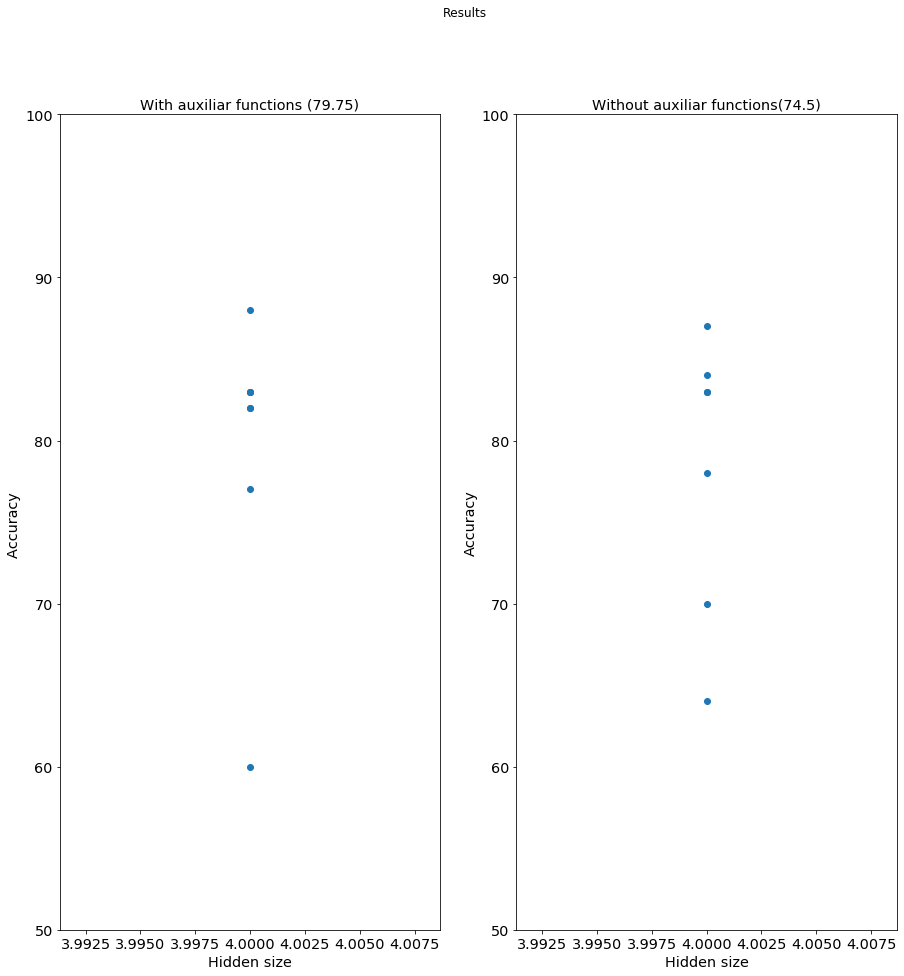

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.hidden_size, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.hidden_size, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('Hidden size')
ax2.set_xlabel('Hidden size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

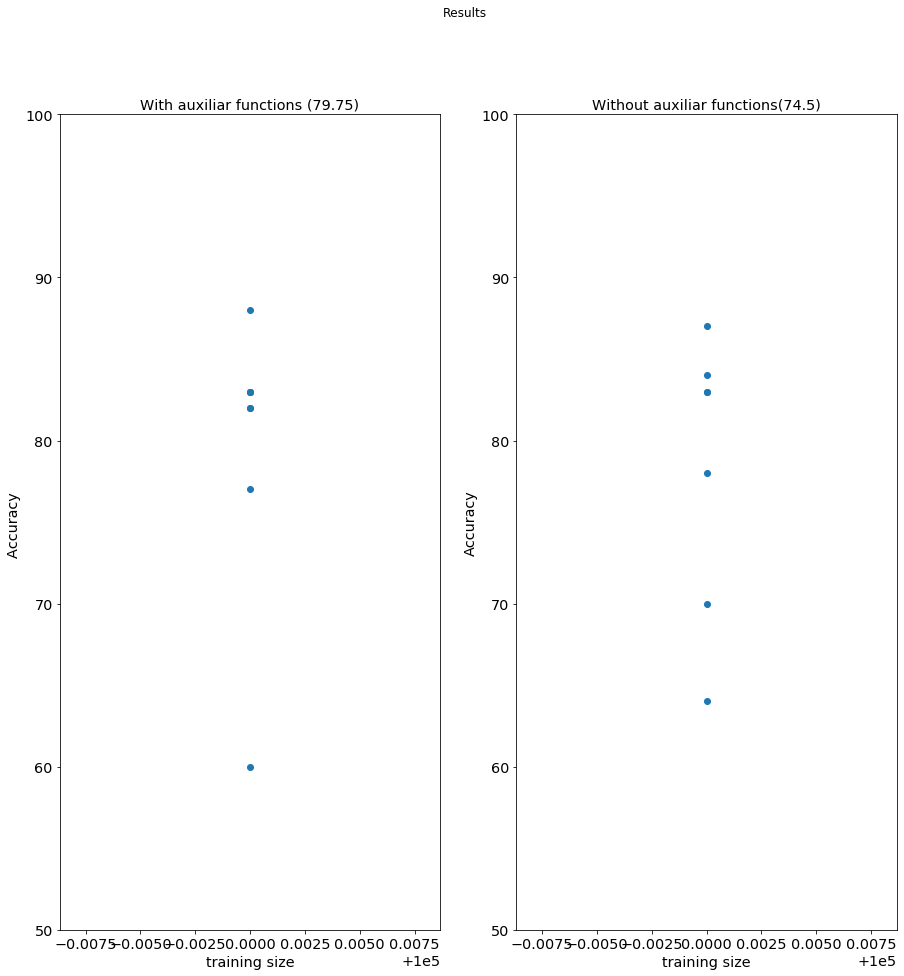

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.n, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.n, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

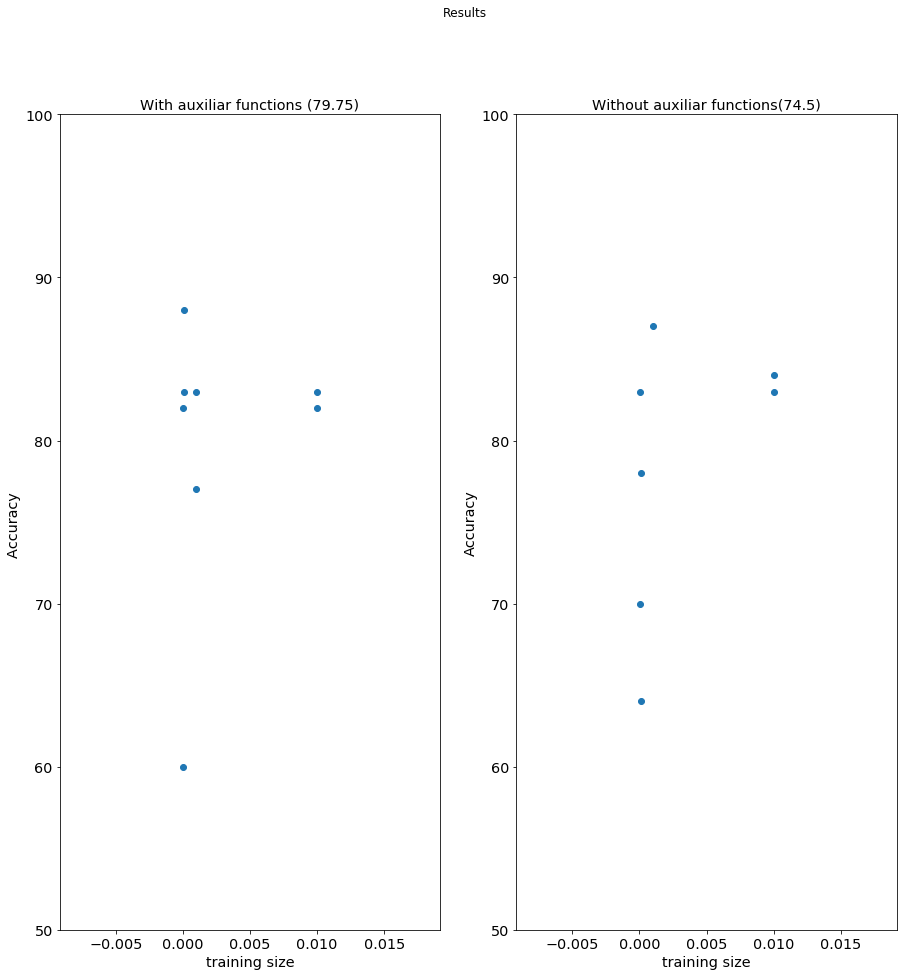

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.EPS1, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.EPS1, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

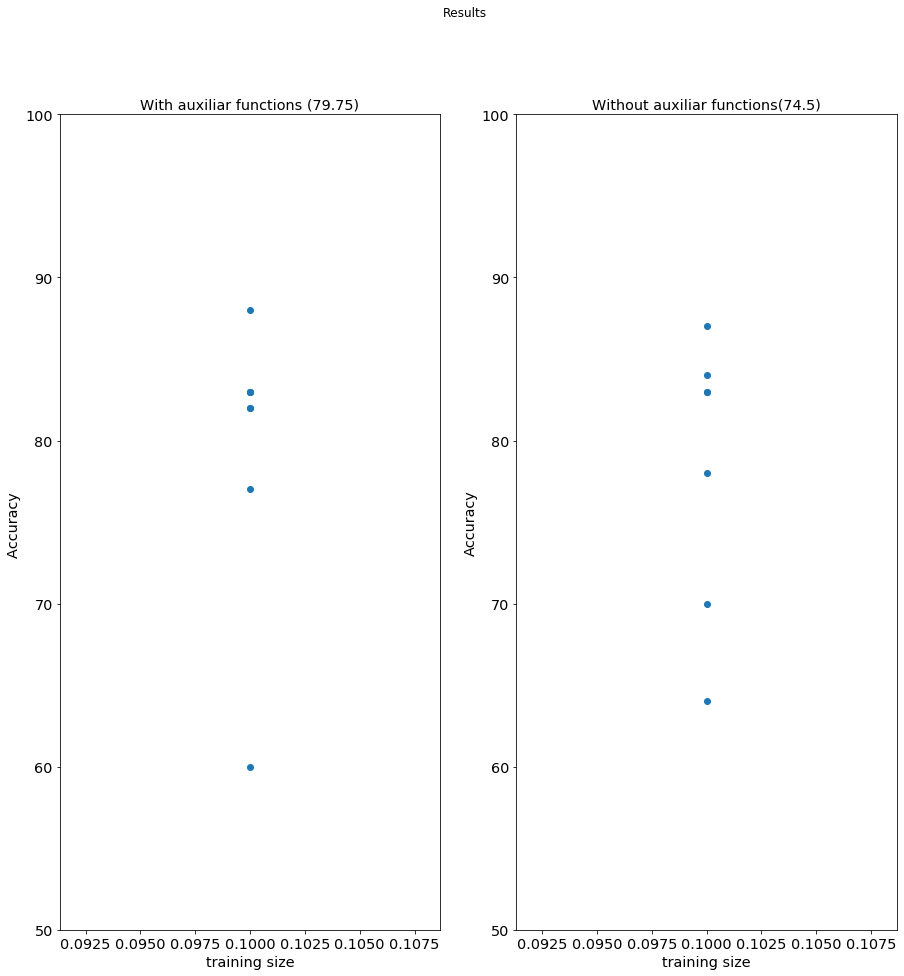

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [21]:
data_aux.epsilon.unique()

array([0.1])

In [22]:
data2 = pd.read_csv("06-04-2021-results.csv")

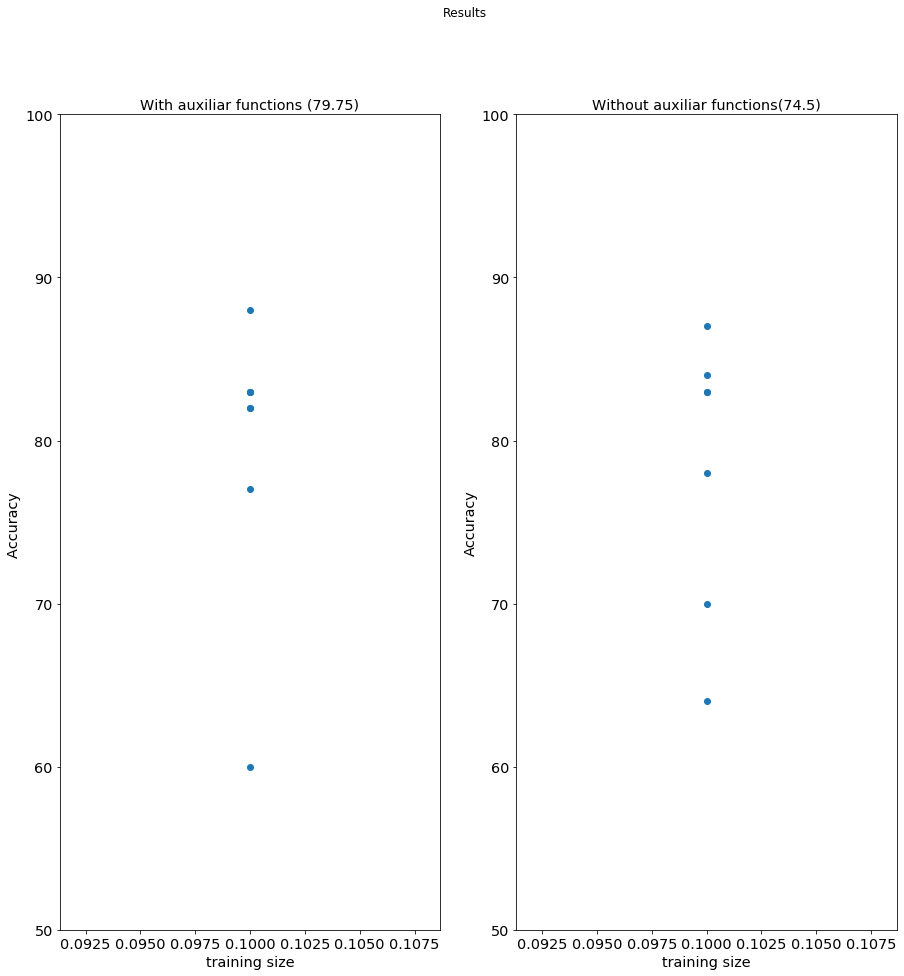

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()